In [1]:
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
data = pd.read_csv('../../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df = data.copy()
df["gender"]= data["gender"].apply(lambda x: 0 if x ==  'Male' else 1)
for col in ["Partner", "PhoneService", 'PaperlessBilling', 'Churn', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Dependents','OnlineSecurity']:
    data[col]= data[col].apply(lambda x: 0 if x ==  'No' else 1)

In [8]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,1,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: >

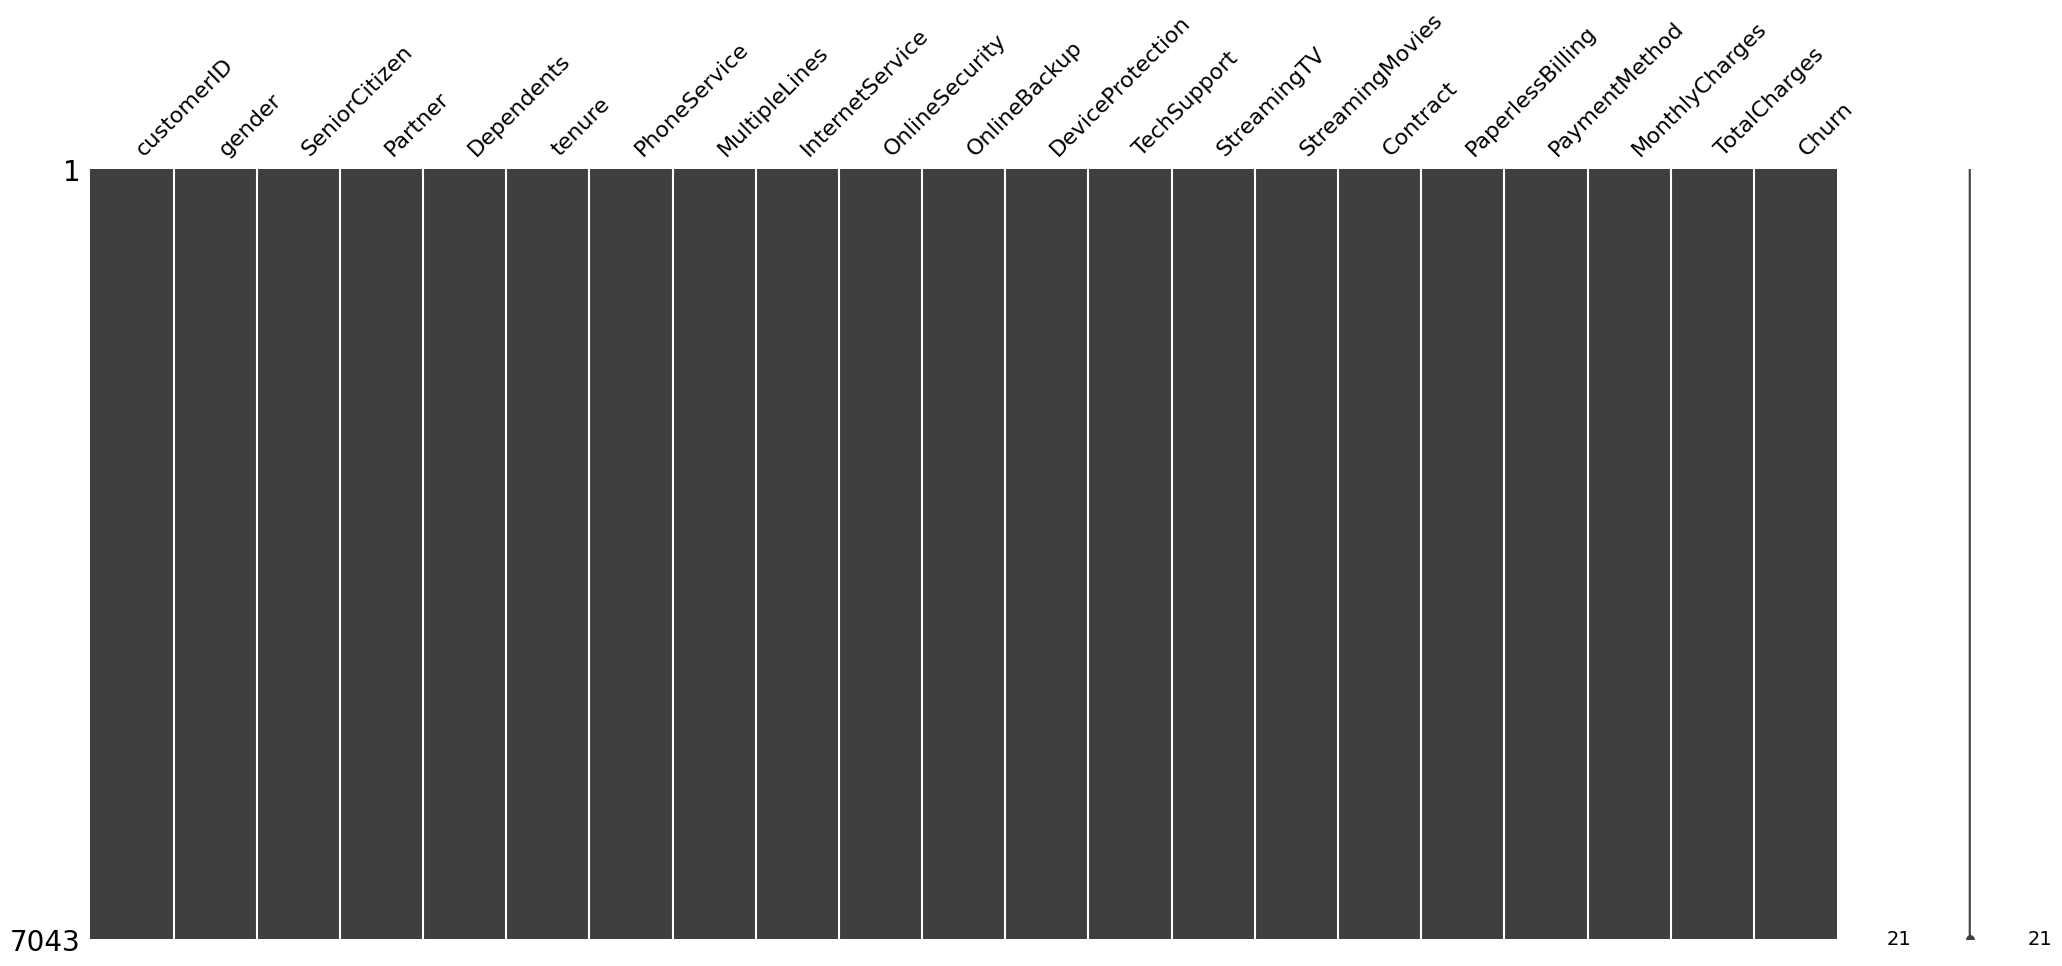

In [9]:
msno.matrix(data)

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [11]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

### Encodage des colonnes binaires

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df['Partner'] = LabelEncoder().fit_transform(df['Partner'])
df['Dependents'] = LabelEncoder().fit_transform(df['Dependents'])
df['PhoneService'] = LabelEncoder().fit_transform(df['PhoneService'])
df['OnlineSecurity'] = LabelEncoder().fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = LabelEncoder().fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = LabelEncoder().fit_transform(df['DeviceProtection'])
df['TechSupport'] = LabelEncoder().fit_transform(df['TechSupport'])
df['StreamingTV'] = LabelEncoder().fit_transform(df['StreamingTV'])
df['StreamingMovies'] = LabelEncoder().fit_transform(df['StreamingMovies'])
df['PaperlessBilling'] = LabelEncoder().fit_transform(df['PaperlessBilling'])
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])
# df['MultipleLines_No phone service'] = LabelEncoder().fit_transform(df['MultipleLines_No phone service'])

# MultipleLines_No phone service





In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Encodage des colonnes multiples à faible cardinalité

In [16]:
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod' ], drop_first=False, dtype=int)
# df = df.drop(['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod'], axis=1)

In [17]:
# print(df['MultipleLines_No phone service'].value_counts())

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,0,2,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,2,0,2,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,2,2,0,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,2,0,2,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [19]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [20]:
df.isnull().sum()

customerID                                 0
gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetSe

In [21]:
X = df.drop(columns=["Churn", "customerID"])
y = df["Churn"]
X.shape, y.shape

((7043, 28), (7043,))

In [22]:
X.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,2,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,2,0,2,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,2,2,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,2,0,2,2,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [23]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [24]:
!pip install tensorflow


In [25]:
!nvcc --version

zsh:1: command not found: nvcc


## Deep Learning

In [26]:
from sklearn.model_selection import train_test_split

# X = df.drop(columns=['Churn'])
# y = df['Churn']                                # cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)


##  DEEP Learning Part 1 : TENSORFLOW

In [27]:
from dotenv import load_dotenv

load_dotenv()

os.environ["MLFLOW_TRACKING_USERNAME"] = "A-Delvoye"
os.environ["MLFLOW_TRACKING_PASSWORD"] = os.getenv("MLFLOW_TRACKING_PASSWORD")
os.environ["MLFLOW_TRACKING_URI"] = (
    "https://dagshub.com/A-Delvoye/TelcoNova_DeepL.mlflow"
)

In [28]:
import mlflow

mlflow.set_experiment("A_20/05_v1")
with mlflow.start_run():
  mlflow.log_param("learning_rate", 0.001)
  mlflow.log_param("batch_size", 32)
  mlflow.log_metric("recall", 0.80)


2025/05/20 14:05:54 INFO mlflow.tracking.fluent: Experiment with name 'A_20/05_v1' does not exist. Creating a new experiment.


🏃 View run monumental-mouse-509 at: https://dagshub.com/A-Delvoye/TelcoNova_DeepL.mlflow/#/experiments/2/runs/eaf1b9d859fa4f9eb4fea492d2f8d2e2
🧪 View experiment at: https://dagshub.com/A-Delvoye/TelcoNova_DeepL.mlflow/#/experiments/2


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # classification binaire
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


2025-05-20 14:05:56.494120: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747742756.507999   11572 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747742756.512289   11572 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747742756.522906   11572 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747742756.522926   11572 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747742756.522927   11572 computation_placer.cc:177] computation placer alr

In [30]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5494 - loss: 121.5300 - val_accuracy: 0.7578 - val_loss: 12.7060
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6595 - loss: 27.9155 - val_accuracy: 0.7205 - val_loss: 4.2031
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6509 - loss: 14.6450 - val_accuracy: 0.6442 - val_loss: 1.5749
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - loss: 8.8074 - val_accuracy: 0.2981 - val_loss: 9.3568
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6573 - loss: 5.8873 - val_accuracy: 0.7427 - val_loss: 1.5237
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6943 - loss: 4.6796 - val_accuracy: 0.7249 - val_loss: 1.0066
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6778 - loss: 4.3475 - val_accuracy: 0.7720 - val_loss: 1.1459
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7075 - loss: 3.5370 - val_accurac

### Evaluation

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7863 - loss: 0.4414 

✅ Test Accuracy: 0.7949


## Rapport de clasification

In [32]:
# Rapport de classification
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1035
           1       0.70      0.40      0.51       374

    accuracy                           0.79      1409
   macro avg       0.76      0.67      0.69      1409
weighted avg       0.78      0.79      0.77      1409

Confusion Matrix:
 [[970  65]
 [224 150]]


### Confusion matrix

FileNotFoundError: [Errno 2] No such file or directory: 'output/02_confusion_matrix.png'

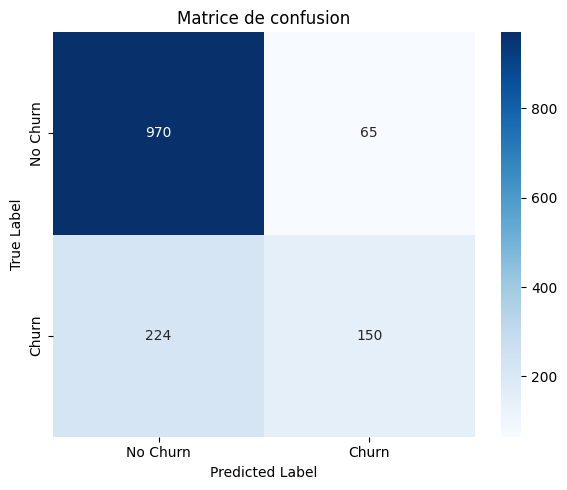

In [33]:
# Confusion matrix plot
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matrice de confusion")

# Sauvegarde dans le dossier output
plt.tight_layout()
plt.savefig("output/02_confusion_matrix.png")
plt.close()

##  DEEP Learning Part 2 : PYTORCH

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        10
dtype: int64 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
dtype: int64
0 0
